In [1]:
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 

from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imageio import imread
import imageio.v3 as iio

import imageio
import cv2

In [2]:
TRAIN_PATH = 'C:/Users/CYBERSPACE/Documents/custom_model/data-science-bowl-2018/stage1_train/'


In [3]:
TRAIN_PATH

'C:/Users/CYBERSPACE/Documents/custom_model/data-science-bowl-2018/stage1_train/'

In [4]:
TEST_PATH = 'C:/Users/CYBERSPACE/Documents/custom_model/data-science-bowl-2018/stage1_test/'

In [5]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [6]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3


In [7]:
# len(TRAIN_PATH)

In [8]:
len(train_ids)

10

In [9]:
# test_ids

In [10]:
X = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
y = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

In [11]:
len(X)

10

In [12]:
len(y)

10

In [13]:
import cv2

In [59]:
# Load the trimap image
trimap = cv2.imread("Abyssinian_1.png")

# Create a blank image to hold the output
output = np.zeros((trimap.shape[0], trimap.shape[1], 2), dtype=np.uint8)

# Iterate over each pixel in the trimap image
for i in range(trimap.shape[0]):
    for j in range(trimap.shape[1]):
        # If the pixel is "foreground," set it to white in the output image
        if trimap[i][j][0] == 255 and trimap[i][j][1] == 255 and trimap[i][j][2] == 255:
            output[i][j] = [255, 255]
        # If the pixel is "background," set it to black in the output image
        elif trimap[i][j][0] == 0 and trimap[i][j][1] == 0 and trimap[i][j][2] == 0:
            output[i][j] = [0, 0]
        # If the pixel is "unknown," set it to gray in the output image
        else:
            output[i][j] = [128, 128]

# Save the output image
cv2.imwrite("output.png", output)

AttributeError: 'NoneType' object has no attribute 'shape'

In [57]:
print('Resizing training images')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = iio.imread(path + '/images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS]  
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X[n] = img  #Fill empty X_train with values from img
    
    
    
#     mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
#     for mask_file in next(os.walk(path + '/masks/'))[2]:
#         mask_ = imread(path + '/masks/' + mask_file)
#         mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
#                                       preserve_range=True), axis=-1)
#         mask = np.maximum(mask, mask_)  
            
#     y[n] = mask 


Resizing training images


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.53it/s]


In [58]:
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = cv2.imread(path + '/masks/' + mask_file)

        image_mask = np.zeros(mask_,(mask_.shape[0], mask_.shape[1], 2), dtype=np.uint8)
        for i in range(mask_.shape[0]):
           # If the pixel is "foreground," set it to white in the output image
            if mask_[i][j][0] == 255 and mask_[i][j][1] == 255 and mask_[i][j][2] == 255:
                image_mask[i][j] = [255, 255]
            # If the pixel is "background," set it to black in the output image
            elif mask_[i][j][0] == 0 and mask_[i][j][1] == 0 and mask_[i][j][2] == 0:
                image_mask[i][j] = [0, 0]
            # If the pixel is "unknown," set it to gray in the output image
            else:
                image_mask[i][j] = [128, 128]

            iamge_mask = np.maximum(mask_,iamge_mask)

        y[n] = iamge_mask 


#         y[n] = cv2.imwrite("output.png", image_mask)




    


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]


AttributeError: 'NoneType' object has no attribute 'shape'

In [64]:
import io
import os
import tensorflow as tf
import PIL
import matplotlib.pyplot as plt
import numpy as np

In [71]:
with tf.io.gfile.GFile("Abyssinian_1.png", 'rb') as fid:
    encoded_mask_png = fid.read()
encoded_png_io = io.BytesIO(encoded_mask_png)
mask = PIL.Image.open(encoded_png_io)            
# plt.imshow( np.array(mask) / 2 * 255 )

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000001CE67138F40>

In [60]:
y

array([[[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        ...,

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]]],


       [[[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [False]],

        [[False],
         [False],
         [False],
         ...,
         [False],
         [False],
         [Fa

In [23]:
# image_ = '._Abyssinian_1.png'
# image_ = np.zeros((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)

In [24]:
# imshow(image_)
# plt.show(np.squeeze(image_))


In [25]:
# image.show()

In [26]:
# import io
# import os
# import tensorflow as tf
# import PIL
# import matplotlib.pyplot as plt
# import numpy as np

In [27]:
# with tf.io.gfile.GFile("image", 'rb') as fid:
#     encoded_mask_png = fid.read()
# encoded_png_io = io.BytesIO(encoded_mask_png)
# mask = PIL.Image.open(encoded_png_io)            
# plt.imshow( np.array(mask) / 2 * 255 )

In [28]:
test_images = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Resizing test images') 
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = iio.imread(path + '/images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    test_images[n] = img

print('Done!')

Resizing test images


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.83it/s]

Done!


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

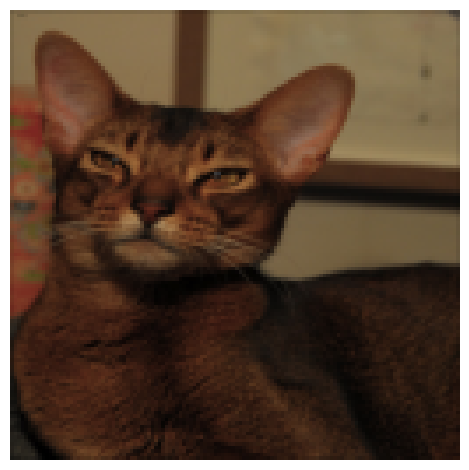

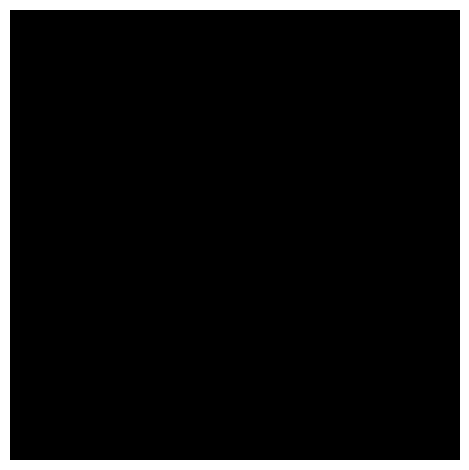

In [33]:
image_x = random.randint(0, len(X_train))
plt.axis("off")
imshow(X_train[image_x])
plt.show()

#for mask image
plt.axis("off")
imshow(np.squeeze(y_train[image_x]))
plt.show()

In [15]:
num_classes = 1



In [148]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

## Downsampling

In [17]:
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
b1 = tf.keras.layers.BatchNormalization()(c1)
r1 = tf.keras.layers.ReLU()(b1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(r1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
b2 = tf.keras.layers.BatchNormalization()(c2)
r2 = tf.keras.layers.ReLU()(b2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(r2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
b3 = tf.keras.layers.BatchNormalization()(c3)
r3 = tf.keras.layers.ReLU()(b3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(r3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
b4 = tf.keras.layers.BatchNormalization()(c4)
r4 = tf.keras.layers.ReLU()(b4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(r4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
b5 = tf.keras.layers.BatchNormalization()(c5)
r5 = tf.keras.layers.ReLU()(b5)
c5 = tf.keras.layers.Dropout(0.3)(r5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

### Upsampling

In [18]:
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
u6 = tf.keras.layers.BatchNormalization()(u6)
u6 = tf.keras.layers.ReLU()(u6)

 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(u6)
u7 = tf.keras.layers.concatenate([u7, c3])
u7 = tf.keras.layers.BatchNormalization()(u7)
u7 = tf.keras.layers.ReLU()(u7)

 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(u7)
u8 = tf.keras.layers.concatenate([u8, c2])
u8 = tf.keras.layers.BatchNormalization()(u8)
u8 = tf.keras.layers.ReLU()(u8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(u8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
u9 = tf.keras.layers.BatchNormalization()(u9)
u9 = tf.keras.layers.ReLU()(u9)

In [19]:
outputs = tf.keras.layers.Conv2D(num_classes, (1, 1), activation='sigmoid')(u9)

In [20]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 conv2d_transpose_1 (Conv2DTran  (None, 32, 32, 64)  65600       ['re_lu_5[0][0]']                
 spose)                                                                                           
                                                                                                  
 concatenate_1 (Concatenate)    (None, 32, 32, 128)  0           ['conv2d_transpose_1[0][0]',     
                                                                  'conv2d_5[0][0]']               
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 32, 32, 128)  512        ['concatenate_1[0][0]']          
 rmalization)                                                                                     
                                                                                                  
 re_lu_6 (

In [23]:
tf.keras.utils.plot_model(model, "model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [24]:
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [25]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
28/28 [==============================] - 72s 2s/step - loss: 0.5665 - accuracy: 0.7726 - val_loss: 0.6192 - val_accuracy: 0.8016
Epoch 2/25
28/28 [==============================] - 60s 2s/step - loss: 0.3792 - accuracy: 0.8714 - val_loss: 0.3910 - val_accuracy: 0.8775
Epoch 3/25
28/28 [==============================] - 58s 2s/step - loss: 0.2763 - accuracy: 0.9143 - val_loss: 0.2611 - val_accuracy: 0.9270
Epoch 4/25
28/28 [==============================] - 60s 2s/step - loss: 0.2159 - accuracy: 0.9320 - val_loss: 0.2287 - val_accuracy: 0.9410
Epoch 5/25
28/28 [==============================] - 62s 2s/step - loss: 0.1858 - accuracy: 0.9400 - val_loss: 0.1896 - val_accuracy: 0.9497
Epoch 6/25
28/28 [==============================] - 59s 2s/step - loss: 0.1607 - accuracy: 0.9466 - val_loss: 0.1570 - val_accuracy: 0.9527
Epoch 7/25
28/28 [==============================] - 62s 2s/step - loss: 0.1446 - accuracy: 0.9506 - val_loss: 0.1352 - val_accuracy: 0.9554
Epoch 8/25
28/28 [==

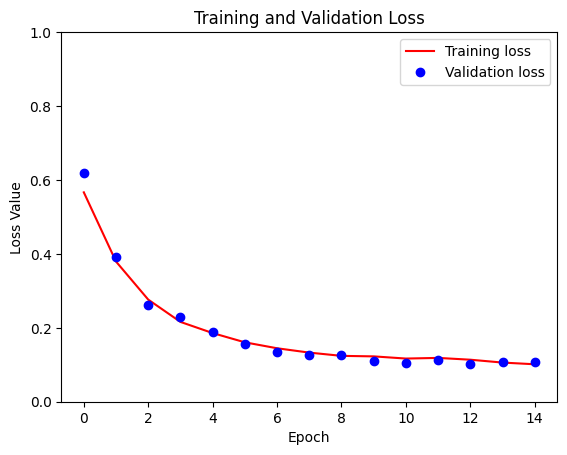

In [26]:
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

plt.figure()
plt.plot( loss, 'r', label='Training loss')
plt.plot( val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

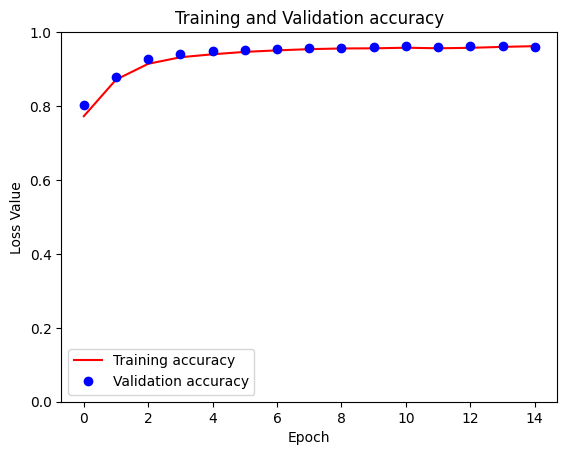

In [27]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']

plt.figure()
plt.plot( accuracy, 'r', label='Training accuracy')
plt.plot( val_accuracy, 'bo', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [28]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input image', 'True mask', 'Predicted mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

In [110]:
i = random.randint(0, len(X_test))
sample_image = X_test[i]
sample_mask = y_test[i]

In [111]:
prediction = model.predict(sample_image[tf.newaxis, ...])[0]

1/1 [==============================] - 0s 90ms/step


In [128]:
predicted_mask = (prediction > 0.9).astype(np.uint8)

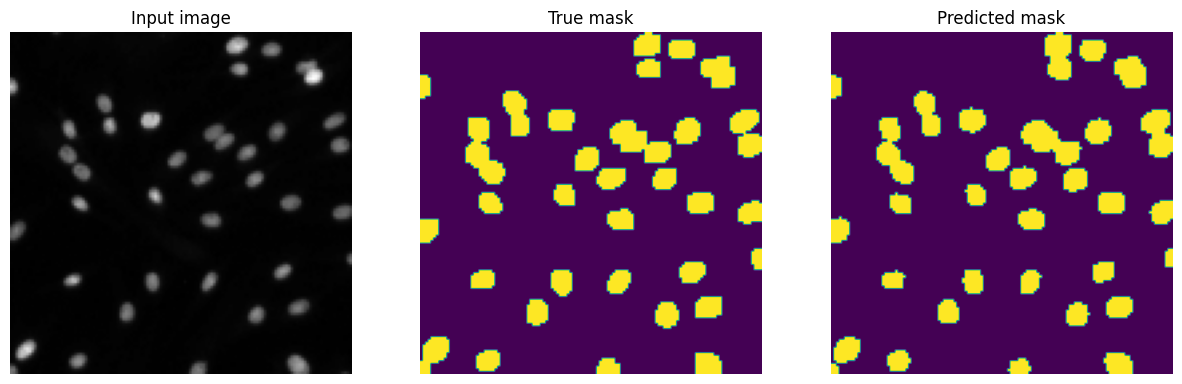

In [129]:
display([sample_image, sample_mask,predicted_mask])

In [149]:

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# from tensorflow import keras
# import tensorflow as tf
# import tensorflow_datasets as tfds
# import cv2
# import PIL
# from IPython.display import clear_output

In [144]:
# tf.keras.datasets.cifar10.load_data()

In [145]:
# dataset = tf.keras.datasets.cifar10.load_data('oxford_iiit_pet:3.*.*')

In [146]:
# dataset